In [34]:
#데이터 준비하기 
import pandas as pd

train_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\train.csv")

ques_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\test.csv")

In [35]:
print(train_data.columns)

Index(['id', 'Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')


Viscra 내장
Shucked Weight  the weight without the shell
Shell Weight 껍질 무게


제거할 번호 465, 762, 47, 382, 435, 1078

In [36]:
train_data[train_data['Viscra Weight']>train_data['Shucked Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,466,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [37]:
train_data[(train_data['Viscra Weight']+train_data['Shucked Weight'])>train_data['Whole Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,48,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,383,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,436,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
1078,1079,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [38]:
train_data[train_data['Shucked Weight']>train_data['Whole Weight']]

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
435,436,I,0.475,0.365,0.10,0.1315,0.2025,0.0875,0.1230,7
1078,1079,I,0.275,0.205,0.07,0.1055,0.4950,0.0190,0.0315,5


In [39]:
print(train_data.shape)
train_data.drop(index=762,axis =0,inplace= True)
train_data.drop(index=465,axis =0,inplace= True)
train_data.drop(index=47,axis =0,inplace= True)
train_data.drop(index=382,axis =0,inplace= True)
train_data.drop(index=435,axis =0,inplace= True)
train_data.drop(index=1078,axis =0,inplace= True)
#만약 제거 하기 싫으면 이거 지우면댐

(1253, 10)


In [40]:
print(train_data.shape)

(1247, 10)


In [41]:
#water = 전체무게 -(껍질무게+껍질을 제외한 무게) 보다 ratio=껍질을 제외한 무게/전체 무게 
water_train = train_data['Whole Weight'] -train_data['Shucked Weight']
water_ques = ques_data['Whole Weight'] -ques_data['Shucked Weight']

In [42]:
train_data['Water'] = water_train
ques_data['Water'] = water_ques

In [43]:
Ratio_train =  train_data['Shucked Weight']/train_data['Whole Weight'] 
Ratio_ques =  ques_data['Shucked Weight']/ques_data['Whole Weight'] 
train_data['Ratio'] = Ratio_train
ques_data['Ratio'] = Ratio_ques
print(train_data.head())
ques_data.head()

   id Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0   1      M   0.605     0.470   0.115        1.1140          0.3925   
1   2      I   0.430     0.315   0.095        0.3780          0.1750   
2   3      I   0.580     0.490   0.195        1.3165          0.5305   
3   4      M   0.535     0.405   0.175        1.2705          0.5480   
4   5      I   0.310     0.235   0.090        0.1270          0.0480   

   Viscra Weight  Shell Weight  Target   Water     Ratio  
0         0.2910        0.3100      15  0.7215  0.352334  
1         0.0800        0.1045       8  0.2030  0.462963  
2         0.2540        0.4100      18  0.7860  0.402962  
3         0.3265        0.3370      13  0.7225  0.431326  
4         0.0310        0.0400       6  0.0790  0.377953  


,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Water,Ratio
0,1,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550,0.6695,0.402765
1,2,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600,0.6510,0.297735
2,3,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305,0.0555,0.427835
3,4,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300,0.6470,0.412886
4,5,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050,0.5955,0.464960


In [44]:
train_target = train_data['Target']
print(train_data.shape,ques_data.shape,train_target.shape)
train_data.drop(['id', 'Target'], axis=1,inplace=True)
ques_data.drop(['id'], axis=1,inplace=True)
train_data = pd.get_dummies(train_data)
ques_data = pd.get_dummies(ques_data)

print(train_data.shape,ques_data.shape,train_target.shape)

(1247, 12) (2924, 11) (1247,)
(1247, 12) (2924, 12) (1247,)


In [45]:
train_max_input = train_data.to_numpy()
train_max_target = train_target.to_numpy()
ques_input = ques_data.to_numpy()

In [46]:
#특성공학으로도 늘려보기
#특성공학으로 특성 늘리기
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3,include_bias= False)
poly.fit(train_max_input)
train_max_poly=poly.transform(train_max_input)
ques_poly = poly.transform(ques_input)

In [47]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_max_poly)
train_max_scaled = ss.transform(train_max_poly)
ques_scaled =ss.transform(ques_poly)

In [48]:
from sklearn.model_selection import train_test_split
train_scaled, test_scaled, train_target, test_target = train_test_split(train_max_scaled,train_max_target,test_size=0.2, random_state=42)

In [49]:
print(train_max_scaled.shape)
print(train_scaled.shape)
print(test_scaled.shape)

(1247, 454)
(997, 454)
(250, 454)


In [50]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Dense(16,activation='elu', input_dim=454))
model.add(keras.layers.Dense(32,activation='elu'))
model.add(keras.layers.Dense(64,activation='elu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(32,activation='elu'))
model.add(keras.layers.Dense(16,activation='elu'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                7280      
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [51]:
#loss: 'mean_absolute_error'
#optimizer 따로 함수 만들어서 다른것도 만들어보기
model.compile(loss ='mean_squared_error',optimizer = 'Nadam',metrics =['mean_absolute_percentage_error'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('딥러닝_1(model)', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=100,restore_best_weights=True)


In [52]:
history = model.fit(train_scaled,train_target,validation_split=0.2,epochs=1000,callbacks=[checkpoint_cb,early_stopping_cb])
print(early_stopping_cb.stopped_epoch)

Epoch 1/1000
25/25 [==============================] - 1s 40ms/step - loss: 55.2625 - mean_absolute_percentage_error: 62.9809 - val_loss: 20.4746 - val_mean_absolute_percentage_error: 34.2328
Epoch 2/1000
25/25 [==============================] - 1s 23ms/step - loss: 13.9135 - mean_absolute_percentage_error: 29.3701 - val_loss: 7.7997 - val_mean_absolute_percentage_error: 18.6699
Epoch 3/1000
25/25 [==============================] - 1s 31ms/step - loss: 6.8491 - mean_absolute_percentage_error: 19.7118 - val_loss: 5.7846 - val_mean_absolute_percentage_error: 16.7010
Epoch 4/1000
25/25 [==============================] - 1s 22ms/step - loss: 6.2156 - mean_absolute_percentage_error: 18.6868 - val_loss: 5.3827 - val_mean_absolute_percentage_error: 15.2761
Epoch 5/1000
25/25 [==============================] - 1s 23ms/step - loss: 5.6517 - mean_absolute_percentage_error: 17.7887 - val_loss: 5.3359 - val_mean_absolute_percentage_error: 14.8733
Epoch 6/1000
25/25 [==============================] 

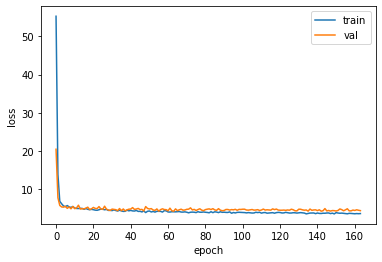

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


In [54]:
ans = model.predict(ques_scaled)
print(type(ans))
print(ans.shape)
print(ans[:10])

<class 'numpy.ndarray'>
(2924, 1)
[[10.721231 ]
 [15.988731 ]
 [ 5.6718564]
 [11.982263 ]
 [10.464489 ]
 [11.019437 ]
 [10.499489 ]
 [ 7.647262 ]
 [10.048168 ]
 [ 9.860276 ]]


In [55]:
#submission = pd.read_csv("E:\데이콘\전복나이 예측\데이터\sample_submission.csv")
#submission['Target'] = ans
#submission.to_csv("Submit_10(딥러닝2).csv",index=False)